# Team 5 - Predicting Heart-Related Diseases

### Problem statement:   
The idea of the project is to explore the factors related to heart disease and to create a model that can predict whether or not heart disease exists based on these factors.

#### Facts about heart diseases:
Cardiovascular diseases (CVDs) are the leading cause of death globally, taking an estimated 17.9 million lives each year. CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions. More than four out of five CVD deaths are due to heart attacks and strokes, and one third of these deaths occur prematurely in people under 70 years of age.

https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1

#### Source of the data: 
The heart disease data set was found in: https://archive.ics.uci.edu/ml/datasets/heart+Disease  
Includes 4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach. The total number of instances are 920.

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.

**Attributes description** 

1. #3 (age)
2. #4 (sex): sex: sex (1 = male; 0 = female)
3. #9 (cp): cp: chest pain type(1=typical angina, 2=atypical angina, 3=non-anginal pain, 4=asymptomatic)
4. #10 (trestbps): trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. #12 (chol): chol: serum cholestoral in mg/dl
6. #16 (fbs): fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. #19 (restecg): restecg: resting electrocardiographic results (0=normal, 1=having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2= showing probable or definite left ventricular hypertrophy  by Estes' criteria
8. #32 (thalach):  thalach: maximum heart rate achieved
9. #38 (exang): exang: exercise induced angina (1 = yes; 0 = no)
10. #40 (oldpeak): oldpeak = ST depression induced by exercise relative to rest
11. #41 (slope): slope: the slope of the peak exercise ST segment (1=upsloping, 2=flat, 3=downsloping)
12. #44 (ca): number of major vessels (0-3) colored by flourosopy
13. #51 (thal): A blood disorder called thalassemia = 3 = normal; 6 = fixed defect; 7 = reversable defect
14. #58 (target) (the predicted attribute): diagnosis of heart disease = presence (values 1,2,3,4), absence (value
     0).  


In [302]:
#LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [303]:
# These options help us to inspect our data more easily.
pd.set_option("display.max_columns", 85)
pd.set_option("display.max_rows", 85)

In [304]:
# These commands load and read the 4 different dataframes: Cleveland, Hungary, Switzerland, and the VA Long Beach

na_vals = ['NA','Missing','?']   #convert to NaN value

df_cleveland = pd.read_csv("processed.cleveland.csv", header = None, na_values=na_vals) #Each data set convert the values of na_vals to NaN values
df_hungarian = pd.read_csv("processed.hungarian.csv", header = None, na_values=na_vals)
df_va = pd.read_csv("processed.va.csv", header = None, na_values=na_vals)
df_switzerland = pd.read_csv("processed.switzerland.csv",header = None, na_values=na_vals)


In [305]:
#Set the name of the 14 Attributes

column_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']

In [306]:
#----------------------------CLEVELAND------------------------------------
#Add the names of the attributes to the dataset
df_cleveland.columns = column_names

In [307]:
#Add a column to name the region of the data collected to identify the origin of each data when mergin the datasets
df_cleveland['region']='Cleveland'

In [308]:
#Data visualization of the first 5 rows
df_cleveland.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,region
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Cleveland
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Cleveland
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,Cleveland
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,Cleveland
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,Cleveland


In [309]:
#Number of columns and rows of the dataframe
df_cleveland.shape

(303, 15)

In [310]:
#----------------------------HUNGARY------------------------------------
df_hungarian.columns = column_names
df_hungarian['region']='Hungary'

df_hungarian.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,region
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0,Hungary
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0,Hungary
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0,Hungary
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0,Hungary
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0,Hungary


In [311]:
df_hungarian.shape

(294, 15)

In [312]:
#----------------------------LONG BEACH------------------------------------
df_va.columns = column_names
df_va['region']='Long Beach'
df_va.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,region
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2,Long Beach
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0,Long Beach
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2,Long Beach
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1,Long Beach
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0,Long Beach


In [313]:
df_va.shape

(200, 15)

In [314]:
#----------------------------SWITZERLAND------------------------------------
df_switzerland.columns = column_names
df_switzerland['region']='Switzerland'
df_switzerland.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,region
0,32,1,1,95.0,0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1,Switzerland
1,34,1,4,115.0,0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1,Switzerland
2,35,1,4,NaN,0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3,Switzerland
3,36,1,4,110.0,0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1,Switzerland
4,38,0,4,105.0,0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2,Switzerland


In [315]:
df_switzerland.shape

(123, 15)

In [316]:
#Concatenate the 4 datasets

df_conc = pd.concat([df_cleveland, df_hungarian, df_va, df_switzerland], axis = 0)

# DATA PREPARATION
###  Merged database: conc

In [317]:
df_conc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,region
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Cleveland
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Cleveland
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,Cleveland
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,Cleveland
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,Cleveland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70.0,1.0,4.0,115.0,0.0,0.0,1.0,92.0,1.0,0.0,2.0,NaN,7.0,1,Switzerland
119,70.0,1.0,4.0,140.0,0.0,1.0,0.0,157.0,1.0,2.0,2.0,NaN,7.0,3,Switzerland
120,72.0,1.0,3.0,160.0,0.0,NaN,2.0,114.0,0.0,1.6,2.0,2.0,NaN,0,Switzerland
121,73.0,0.0,3.0,160.0,0.0,0.0,1.0,121.0,0.0,0.0,1.0,NaN,3.0,1,Switzerland


In [318]:
df_conc.shape

(920, 15)

In [319]:
#Data type of the merged dataframe
df_conc.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
region       object
dtype: object

In [320]:
#Fix Data type
lst=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
df_conc[lst] = df_conc[lst].astype(object)

In [321]:
df_conc.dtypes

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
region       object
dtype: object

In [322]:
#----------------------------------DATA CLEANING----------------------------------------------------
#Checking for outliers in Attribute: Age 

df_conc['age'].unique() 

array([63., 67., 37., 41., 56., 62., 57., 53., 44., 52., 48., 54., 49.,
       64., 58., 60., 50., 66., 43., 40., 69., 59., 42., 55., 61., 65.,
       71., 51., 46., 45., 39., 68., 47., 34., 35., 29., 70., 77., 38.,
       74., 76., 28., 30., 31., 32., 33., 36., 72., 75., 73.])

In [323]:
#Checking for outliers in Attribute: Sex (1 = male; 0 = female)
df_conc['sex'].unique() 

array([1.0, 0.0], dtype=object)

In [324]:
#Checking for outliers in Attribute: cp: chest pain type(1=typical angina, 2=atypical angina, 3=non-anginal pain, 4=asymptomatic)
df_conc['cp'].unique() 

array([1.0, 4.0, 3.0, 2.0], dtype=object)

In [325]:
#Checking for outliers in Attribute: trstbps =resting blood pressure (in mm Hg on admission to the hospital)

df_conc['trestbps'].unique() 

array([145., 160., 120., 130., 140., 172., 150., 110., 132., 117., 135.,
       112., 105., 124., 125., 142., 128., 170., 155., 104., 180., 138.,
       108., 134., 122., 115., 118., 100., 200.,  94., 165., 102., 152.,
       101., 126., 174., 148., 178., 158., 192., 129., 144., 123., 136.,
       146., 106., 156., 154., 114., 164.,  98., 190.,  nan, 113.,  92.,
       116.,   0.,  96., 127.,  95.,  80., 185.])

In [326]:
#Zero is outliers then replace it as NaN
df_conc['trestbps'].replace(0, 'NaN' ,inplace=True)

In [327]:
df_conc['trestbps'].unique()

array([145.0, 160.0, 120.0, 130.0, 140.0, 172.0, 150.0, 110.0, 132.0,
       117.0, 135.0, 112.0, 105.0, 124.0, 125.0, 142.0, 128.0, 170.0,
       155.0, 104.0, 180.0, 138.0, 108.0, 134.0, 122.0, 115.0, 118.0,
       100.0, 200.0, 94.0, 165.0, 102.0, 152.0, 101.0, 126.0, 174.0,
       148.0, 178.0, 158.0, 192.0, 129.0, 144.0, 123.0, 136.0, 146.0,
       106.0, 156.0, 154.0, 114.0, 164.0, 98.0, 190.0, nan, 113.0, 92.0,
       116.0, 'NaN', 96.0, 127.0, 95.0, 80.0, 185.0], dtype=object)

In [328]:
#Checking for outliers in Attribute:chol = serum cholestoral in mg/dl
df_conc['chol'].unique()

array([233., 286., 229., 250., 204., 236., 268., 354., 254., 203., 192.,
       294., 256., 263., 199., 168., 239., 275., 266., 211., 283., 284.,
       224., 206., 219., 340., 226., 247., 167., 230., 335., 234., 177.,
       276., 353., 243., 225., 302., 212., 330., 175., 417., 197., 198.,
       290., 253., 172., 273., 213., 305., 216., 304., 188., 282., 185.,
       232., 326., 231., 269., 267., 248., 360., 258., 308., 245., 270.,
       208., 264., 321., 274., 325., 235., 257., 164., 141., 252., 255.,
       201., 222., 260., 182., 303., 265., 309., 307., 249., 186., 341.,
       183., 407., 217., 288., 220., 209., 227., 261., 174., 281., 221.,
       205., 240., 289., 318., 298., 564., 246., 322., 299., 300., 293.,
       277., 214., 207., 223., 160., 394., 184., 315., 409., 244., 195.,
       196., 126., 313., 259., 200., 262., 215., 228., 193., 271., 210.,
       327., 149., 295., 306., 178., 237., 218., 242., 319., 166., 180.,
       311., 278., 342., 169., 187., 157., 176., 24

In [329]:
df_conc['chol'].replace(0, 'NaN' ,inplace=True)

In [330]:
df_conc['chol'].unique()

array([233.0, 286.0, 229.0, 250.0, 204.0, 236.0, 268.0, 354.0, 254.0,
       203.0, 192.0, 294.0, 256.0, 263.0, 199.0, 168.0, 239.0, 275.0,
       266.0, 211.0, 283.0, 284.0, 224.0, 206.0, 219.0, 340.0, 226.0,
       247.0, 167.0, 230.0, 335.0, 234.0, 177.0, 276.0, 353.0, 243.0,
       225.0, 302.0, 212.0, 330.0, 175.0, 417.0, 197.0, 198.0, 290.0,
       253.0, 172.0, 273.0, 213.0, 305.0, 216.0, 304.0, 188.0, 282.0,
       185.0, 232.0, 326.0, 231.0, 269.0, 267.0, 248.0, 360.0, 258.0,
       308.0, 245.0, 270.0, 208.0, 264.0, 321.0, 274.0, 325.0, 235.0,
       257.0, 164.0, 141.0, 252.0, 255.0, 201.0, 222.0, 260.0, 182.0,
       303.0, 265.0, 309.0, 307.0, 249.0, 186.0, 341.0, 183.0, 407.0,
       217.0, 288.0, 220.0, 209.0, 227.0, 261.0, 174.0, 281.0, 221.0,
       205.0, 240.0, 289.0, 318.0, 298.0, 564.0, 246.0, 322.0, 299.0,
       300.0, 293.0, 277.0, 214.0, 207.0, 223.0, 160.0, 394.0, 184.0,
       315.0, 409.0, 244.0, 195.0, 196.0, 126.0, 313.0, 259.0, 200.0,
       262.0, 215.0,

In [331]:
#Checking for outliers in Attribute:fbs= (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
df_conc['fbs'].unique()

array([1.0, 0.0, nan], dtype=object)

In [332]:
#Checking for outliers in Attribute: restecg: resting electrocardiographic results (0=normal, 1=having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2= showing probable or definite left ventricular hypertrophy  by Estes' criteria

df_conc['restecg'].unique()

array([2.0, 0.0, 1.0, nan], dtype=object)

In [333]:
#Checking for outliers in Attribute:  thalach: maximum heart rate achieved

df_conc['thalach'].unique()

array([150., 108., 129., 187., 172., 178., 160., 163., 147., 155., 148.,
       153., 142., 173., 162., 174., 168., 139., 171., 144., 132., 158.,
       114., 151., 161., 179., 120., 112., 137., 157., 169., 165., 123.,
       128., 152., 140., 188., 109., 125., 131., 170., 113.,  99., 177.,
       141., 180., 111., 143., 182., 156., 115., 149., 145., 146., 175.,
       186., 185., 159., 130., 190., 136.,  97., 127., 154., 133., 126.,
       202., 103., 166., 164., 184., 124., 122.,  96., 138.,  88., 105.,
       194., 195., 106., 167.,  95., 192., 117., 121., 116.,  71., 118.,
       181., 134.,  90.,  98., 176., 135., 110.,  nan, 100.,  87., 102.,
        92.,  91.,  82., 119.,  94.,  86.,  84.,  80., 107.,  69.,  73.,
        93., 104.,  60.,  83.,  63.,  70.,  77.,  72.,  78.,  67.])

In [334]:
#Checking for outliers in Attribute: exang: exercise induced angina (1 = yes; 0 = no)

df_conc['exang'].unique()

array([0.0, 1.0, nan], dtype=object)

In [335]:
#Checking for outliers in Attribute: oldpeak = ST depression induced by exercise relative to rest

df_conc['oldpeak'].unique()

array([ 2.3,  1.5,  2.6,  3.5,  1.4,  0.8,  3.6,  0.6,  3.1,  0.4,  1.3,
        0. ,  0.5,  1.6,  1. ,  1.2,  0.2,  1.8,  3.2,  2.4,  2. ,  2.5,
        2.2,  2.8,  3. ,  3.4,  6.2,  4. ,  5.6,  2.9,  0.1,  2.1,  1.9,
        4.2,  0.9,  1.1,  3.8,  0.7,  0.3,  4.4,  5. , -0.5,  nan,  1.7,
       -1.1, -1.5, -0.1, -2.6, -0.7, -2. , -1. , -0.8, -0.9,  3.7])

In [336]:
#Checking for outliers in Attribute: slope: the slope of the peak exercise ST segment (1=upsloping, 2=flat, 3=downsloping)
df_conc['slope'].unique()

array([3.0, 2.0, 1.0, nan], dtype=object)

In [337]:
#Checking for outliers in Attribute: ca: number of major vessels (0-3) colored by flourosopy

df_conc['ca'].unique()

array([0.0, 3.0, 2.0, 1.0, nan], dtype=object)

In [338]:
#Checking for outliers in Attribute: thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

df_conc['thal'].unique()

array([6.0, 3.0, 7.0, nan], dtype=object)

In [339]:
#Checking for outliers in Attribute: target (the predicted attribute) = diagnosis of heart disease = presence (values 1,2,3,4), absence (value 0).  
df_conc['target'].unique()

array([0, 2, 1, 3, 4], dtype=object)

In [340]:
#For better understanding the presence values will be reduced only to 1
df_conc.loc[df_conc.target > 1, 'target'] = 1
df_conc['target'].unique()

array([0, 1], dtype=object)

In [341]:
#Total of null values
print(pd.isnull(df_conc).sum())


age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
region        0
dtype: int64


In [342]:
#Real values
print(pd.notnull(df_conc).sum())

age         920
sex         920
cp          920
trestbps    861
chol        890
fbs         830
restecg     918
thalach     865
exang       865
oldpeak     858
slope       611
ca          309
thal        434
target      920
region      920
dtype: int64


In [343]:
#Look for duplicates
df_conc.duplicated().sum()

2

In [344]:
df_conc.loc[df_conc.duplicated(keep=False), :]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,region
101,49.0,0.0,2.0,110.0,NaN,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0,Hungary
102,49.0,0.0,2.0,110.0,NaN,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0,Hungary
139,58.0,1.0,3.0,150.0,219.0,0.0,1.0,118.0,1.0,0.0,NaN,NaN,NaN,1,Long Beach
187,58.0,1.0,3.0,150.0,219.0,0.0,1.0,118.0,1.0,0.0,NaN,NaN,NaN,1,Long Beach


In [345]:
#Erase duplicates
df_conc.drop_duplicates(inplace=True)
df_conc.duplicated().sum()

0

###  Data exploration

In [346]:
#Categorical variables------------------------------------------------------------------------------------------
#Sex

df_conc.sex.value_counts(dropna=False)

1.0    725
0.0    193
Name: sex, dtype: int64

<AxesSubplot:title={'center':'Histogram'}, xlabel='Gender', ylabel='Total'>

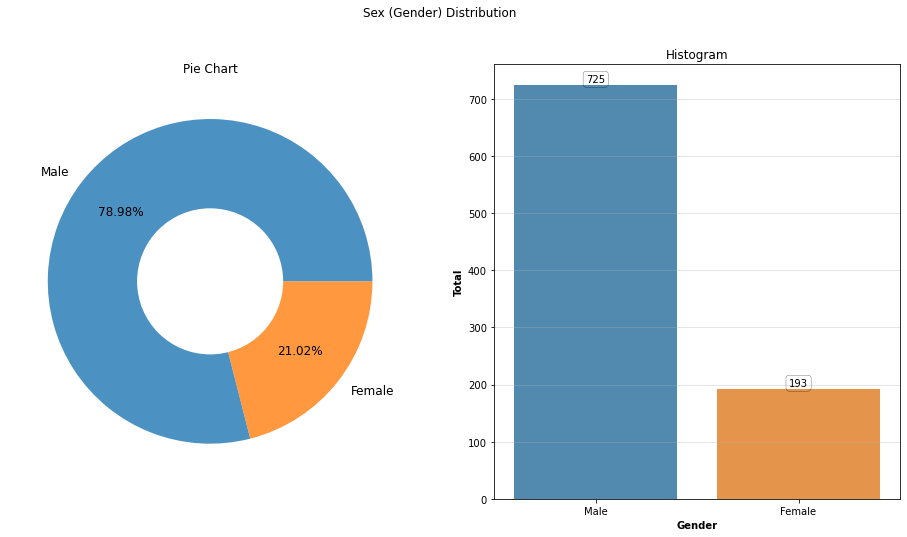

In [347]:
#Categorical variables------------------------------------------------------------------------------------------
#Sex

# --- Labels, Order ---
labels=['Male', 'Female']
order=df_conc['sex'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Sex (Gender) Distribution')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart')
plt.pie(df_conc['sex'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram')
ax = sns.countplot(x='sex', data=df_conc, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Gender', fontweight='bold')
plt.ylabel('Total', fontweight='bold')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt


In [348]:
#Chest pain
df_conc.cp.value_counts(dropna=False)

4.0    496
3.0    203
2.0    173
1.0     46
Name: cp, dtype: int64

<AxesSubplot:title={'center':'Histogram'}, xlabel='Chest pain', ylabel='Total'>

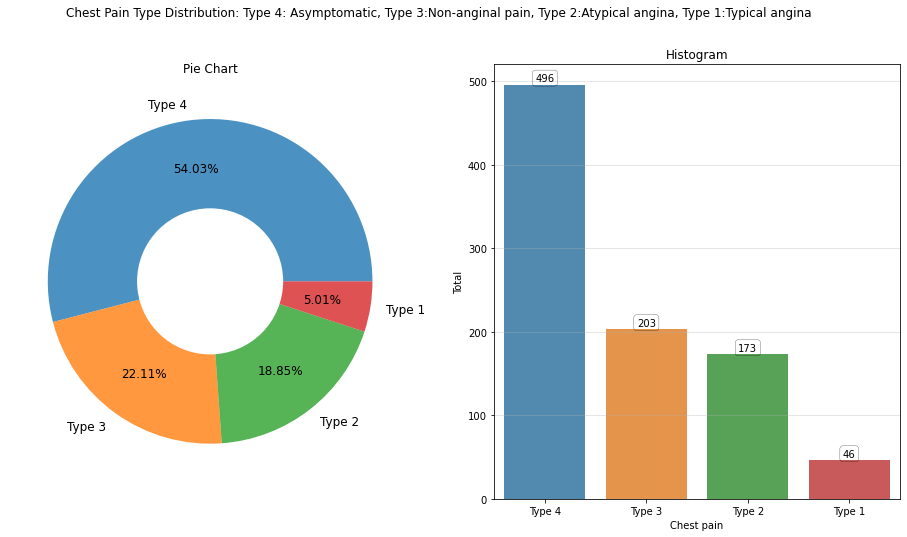

In [349]:
#Chest pain

# --- Labels, Order ---
labels=['Type 4', 'Type 3', 'Type 2', 'Type 1']
order=df_conc['cp'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Chest Pain Type Distribution: Type 4: Asymptomatic, Type 3:Non-anginal pain, Type 2:Atypical angina, Type 1:Typical angina')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart')
plt.pie(df_conc['cp'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram')
ax = sns.countplot(x='cp', data=df_conc, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Chest pain')
plt.ylabel('Total')
plt.xticks([0, 1,2,3], labels)
plt.grid(axis='y', alpha=0.4)
countplt


In [350]:
#Fasting blood sugar
df_conc.fbs.value_counts(dropna=False)

0.0    690
1.0    138
NaN     90
Name: fbs, dtype: int64

<AxesSubplot:title={'center':'Histogram'}, xlabel='Fasting Blood Sugar', ylabel='Total'>

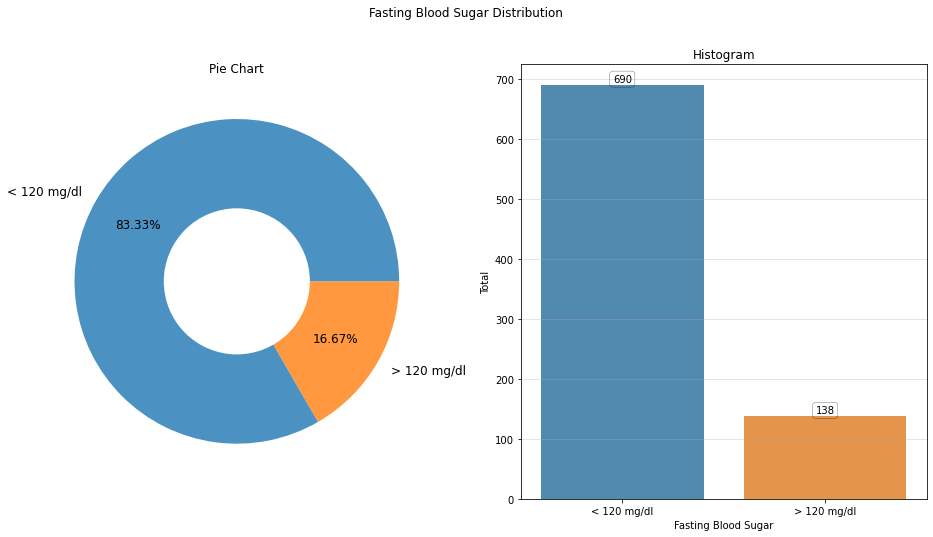

In [351]:
# --- Labels, Order ---
labels=['< 120 mg/dl', '> 120 mg/dl']
order=df_conc['fbs'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Fasting Blood Sugar Distribution')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart')
plt.pie(df_conc['fbs'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram')
ax = sns.countplot(x='fbs', data=df_conc, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Total')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

In [352]:
#Resting Electrocardiographic results
df_conc.restecg.value_counts(dropna=False)

0.0    550
2.0    188
1.0    178
NaN      2
Name: restecg, dtype: int64

<AxesSubplot:title={'center':'Histogram'}, xlabel='Resting ECG', ylabel='Total'>

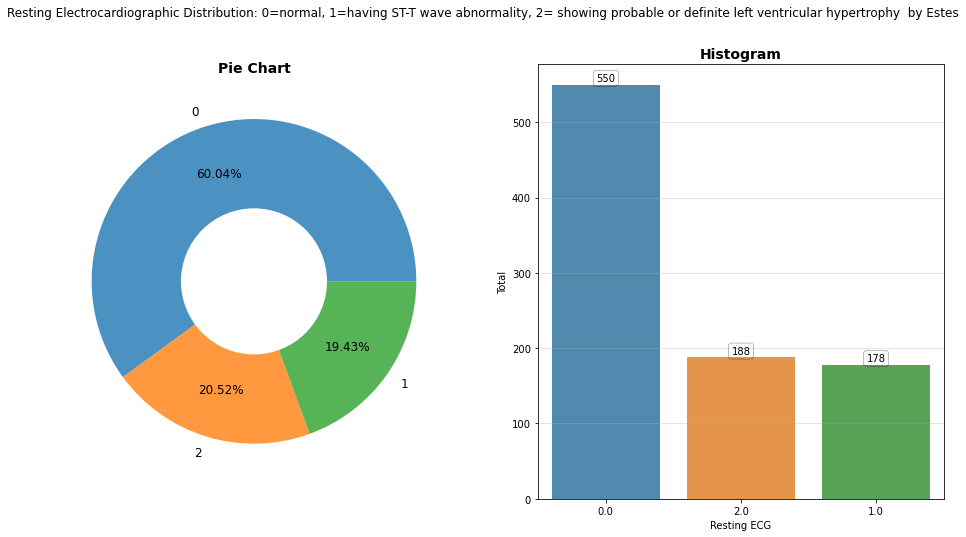

In [353]:
# --- Labels, Order ---


labels=['0', '2', '1']
order=df_conc['restecg'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Resting Electrocardiographic Distribution: 0=normal, 1=having ST-T wave abnormality, 2= showing probable or definite left ventricular hypertrophy  by Estes')

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(df_conc['restecg'].value_counts(), labels=labels, 
        wedgeprops=dict(alpha=0.8), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='restecg', data=df_conc, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Resting ECG')
plt.ylabel('Total')
plt.grid(axis='y', alpha=0.4)
countplt


In [354]:
#Exercise induced angina
df_conc.exang.value_counts(dropna=False)

0.0    527
1.0    336
NaN     55
Name: exang, dtype: int64

In [355]:
#Slope
df_conc.slope.value_counts(dropna=False)

2.0    345
NaN    307
1.0    203
3.0     63
Name: slope, dtype: int64

In [356]:
#Number of major vessels
df_conc.ca.value_counts(dropna=False)

NaN    609
0.0    181
1.0     67
2.0     41
3.0     20
Name: ca, dtype: int64

In [357]:
#Thal
df_conc.thal.value_counts(dropna=False)

NaN    484
3.0    196
7.0    192
6.0     46
Name: thal, dtype: int64

In [358]:
#Diagnosis of heart disease
df_conc.target.value_counts(dropna=False)

1    508
0    410
Name: target, dtype: int64

<AxesSubplot:title={'center':'Histogram'}, xlabel='Heart Disease', ylabel='Total'>

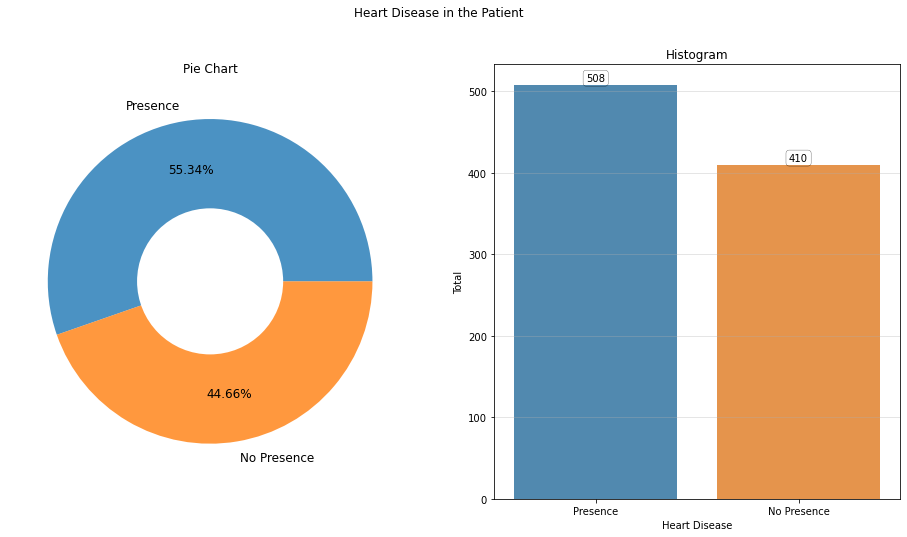

In [359]:
# --- Labels, Order ---
labels=['Presence', 'No Presence']
order=df_conc['target'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Heart Disease in the Patient')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart')
plt.pie(df_conc['target'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram')
ax = sns.countplot(x='target', data=df_conc, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Heart Disease')
plt.ylabel('Total')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

In [360]:
#Summary descriptive statistics of numerical variables
df_conc.describe(include=[np.number])

,age,thalach,oldpeak
count,918.000000,863.000000,856.000000
mean,53.510893,137.542294,0.880841
std,9.432617,25.936524,1.091673
min,28.000000,60.000000,-2.600000
25%,47.000000,120.000000,0.000000
50%,54.000000,140.000000,0.500000
75%,60.000000,157.000000,1.500000
max,77.000000,202.000000,6.200000


###  One hot encoding
Since some of the categorical data (cp, restecg, slope, ca, and thal,region) has values larger than 1 and this may affect the model, will use one hot encoding techinique to transform them into binary categorical variables (1 and 0) by adding columns.

In [361]:
# Creating Dummy Variables for cp, restecg, slope, ca, thal and target
cp = pd.get_dummies(df_conc['cp'], prefix='cp')
restecg = pd.get_dummies(df_conc['restecg'], prefix='restecg')
slope = pd.get_dummies(df_conc['slope'], prefix='slope')
ca = pd.get_dummies(df_conc['ca'], prefix='ca')
thal = pd.get_dummies(df_conc['thal'], prefix='thal')
region = pd.get_dummies(df_conc['region'], prefix='region')

# --- Merge Dummy Variables to Main Data Frame ---
frames = [df_conc, cp, restecg, slope, ca, thal,region]
df_conc = pd.concat(frames, axis = 1)

C:\Users\Yasmin Lozano\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [362]:
df_conc.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,region,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0,region_Cleveland,region_Hungary,region_Long Beach,region_Switzerland
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Cleveland,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1,Cleveland,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,Cleveland,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,Cleveland,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,Cleveland,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0


In [363]:
#As we have already converted the variables to binary, so we do not need the others - ERASE OLD VARIABLES (cp, restecg, slope, ca, and thal,region)

df_conc = df_conc.drop(columns = ['cp', 'thal', 'slope', 'region', 'restecg','ca'])

df_conc.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0,region_Cleveland,region_Hungary,region_Long Beach,region_Switzerland
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0


In [364]:
#KEEP columns name
all_name_columns = list(df_conc.columns)
all_name_columns

['age',
 'sex',
 'trestbps',
 'chol',
 'fbs',
 'thalach',
 'exang',
 'oldpeak',
 'target',
 'cp_1.0',
 'cp_2.0',
 'cp_3.0',
 'cp_4.0',
 'restecg_0.0',
 'restecg_1.0',
 'restecg_2.0',
 'slope_1.0',
 'slope_2.0',
 'slope_3.0',
 'ca_0.0',
 'ca_1.0',
 'ca_2.0',
 'ca_3.0',
 'thal_3.0',
 'thal_6.0',
 'thal_7.0',
 'region_Cleveland',
 'region_Hungary',
 'region_Long Beach',
 'region_Switzerland']

###  Normalization of numerical data
Since the numerical variables show large numbers we will normalize the data (values from zero to one)

In [365]:
df_conc = MinMaxScaler().fit_transform(df_conc)

In [366]:
df_conc = pd.DataFrame(df_conc)

In [367]:
df_conc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.714286,1.0,0.541667,0.285714,1.0,0.633803,0.0,0.556818,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.795918,1.0,0.666667,0.388031,0.0,0.338028,1.0,0.465909,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.795918,1.0,0.333333,0.277992,0.0,0.485915,1.0,0.590909,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.183673,1.0,0.416667,0.318533,0.0,0.894366,0.0,0.693182,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.265306,0.0,0.416667,0.229730,0.0,0.788732,0.0,0.454545,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [371]:
df_conc.columns = all_name_columns
df_conc.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0,region_Cleveland,region_Hungary,region_Long Beach,region_Switzerland
0,0.714286,1.0,0.541667,0.285714,1.0,0.633803,0.0,0.556818,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.795918,1.0,0.666667,0.388031,0.0,0.338028,1.0,0.465909,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.795918,1.0,0.333333,0.277992,0.0,0.485915,1.0,0.590909,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.183673,1.0,0.416667,0.318533,0.0,0.894366,0.0,0.693182,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.265306,0.0,0.416667,0.229730,0.0,0.788732,0.0,0.454545,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [372]:
#Generates a csv file with the final dataset
df_conc.to_csv('dataframe_cleaned_heart_14.csv')

# EXPLORATORY DATA ANALYSIS (EDA)
In total there are 14 Attibutes, 3 of them are numerical (age,thalach,oldpeak) and the rest are categorical.

###  univariate analysis, bivariate analysis, visualisation of numerical and categorical variables, correlation matrix, check pearson correlation heatmaps

# DATA MODELLING



###  random forest classifier, decision tree classifier, logistic regression, k-nearest neighbours classification, support vector machine algorithm, naive bayes algorithm, confusion matrix, model comparison